In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

17it [00:00, 157.98it/s]

28it [00:00, 137.52it/s]

39it [00:00, 126.44it/s]

49it [00:00, 116.77it/s]

60it [00:00, 112.91it/s]

71it [00:00, 109.23it/s]

86it [00:00, 118.55it/s]

103it [00:00, 129.69it/s]

120it [00:00, 139.17it/s]

137it [00:01, 146.60it/s]

154it [00:01, 152.00it/s]

170it [00:01, 149.66it/s]

187it [00:01, 154.59it/s]

204it [00:01, 157.15it/s]

221it [00:01, 159.57it/s]

238it [00:01, 159.46it/s]

255it [00:01, 161.00it/s]

272it [00:01, 135.88it/s]

287it [00:02, 129.34it/s]

304it [00:02, 138.80it/s]

322it [00:02, 147.06it/s]

339it [00:02, 151.77it/s]

356it [00:02, 155.29it/s]

373it [00:02, 157.78it/s]

390it [00:02, 154.08it/s]

406it [00:02, 151.89it/s]

422it [00:02, 149.26it/s]

438it [00:03, 150.09it/s]

454it [00:03, 121.06it/s]

468it [00:03, 124.08it/s]

484it [00:03, 131.11it/s]

498it [00:03, 132.54it/s]

514it [00:03, 138.16it/s]

530it [00:03, 143.49it/s]

546it [00:03, 147.39it/s]

563it [00:03, 151.14it/s]

579it [00:04, 153.68it/s]

596it [00:04, 155.62it/s]

613it [00:04, 157.21it/s]

629it [00:04, 154.35it/s]

645it [00:04, 144.56it/s]


0it [00:00, ?it/s]

16it [00:00, 155.33it/s]

Number of empty sat catalogs is 0


32it [00:00, 154.65it/s]

50it [00:00, 161.47it/s]

61it [00:00, 140.79it/s]

75it [00:00, 140.44it/s]

93it [00:00, 148.92it/s]

112it [00:00, 157.29it/s]

130it [00:00, 161.72it/s]

148it [00:00, 166.04it/s]

166it [00:01, 168.38it/s]

184it [00:01, 171.09it/s]

202it [00:01, 172.09it/s]

220it [00:01, 143.63it/s]

236it [00:01, 146.94it/s]

253it [00:01, 151.00it/s]

270it [00:01, 155.16it/s]

286it [00:01, 156.14it/s]

302it [00:01, 156.17it/s]

318it [00:02, 156.86it/s]

335it [00:02, 159.61it/s]

352it [00:02, 159.45it/s]

369it [00:02, 141.48it/s]

384it [00:02, 130.40it/s]

399it [00:02, 134.52it/s]

416it [00:02, 142.22it/s]

433it [00:02, 148.44it/s]

451it [00:02, 155.12it/s]

469it [00:03, 159.60it/s]

486it [00:03, 161.45it/s]

504it [00:03, 165.98it/s]

522it [00:03, 169.88it/s]

540it [00:03, 172.18it/s]

558it [00:03, 171.62it/s]

576it [00:03, 172.18it/s]

594it [00:03, 173.39it/s]

612it [00:03, 173.81it/s]

630it [00:03, 170.62it/s]

645it [00:04, 156.92it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError
/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

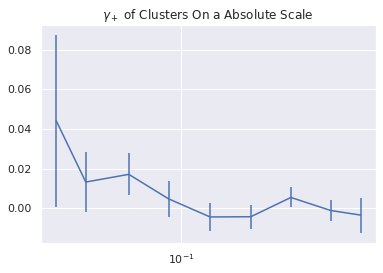

Aggregated xi:
[  0.      -1.5415  -2.8043  -6.7218  -3.0341   5.177    7.3385 -11.9592
   2.7996   2.4817]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -131.3321  -726.2354 -1146.426  -1578.4762 -2289.9842
 -2529.2776 -2270.3058 -1328.8979  -151.5681]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   35.  213.  394.  645. 1166. 1696. 2215. 2366.  709.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.044  -0.0132 -0.0171 -0.0047  0.0044  0.0043 -0.0054  0.0012
  0.0035]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7523 -3.4096 -2.9097 -2.4472 -1.964  -1.4913 -1.025  -0.5617
 -0.2138]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

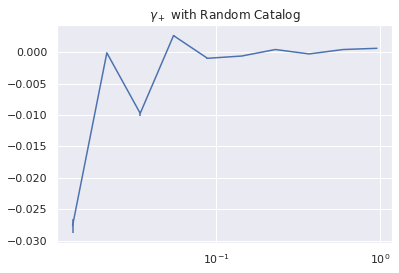

[-0.0277 -0.0001 -0.0097  0.0026 -0.001  -0.0006  0.0004 -0.0003  0.0004
  0.0006]
[ 1.0889e-03  3.9534e-06  3.8372e-04 -1.0405e-04  3.8333e-05  2.4147e-05
 -1.6655e-05  1.0962e-05 -1.6673e-05 -2.4312e-05]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

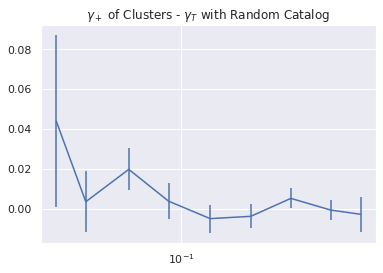

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

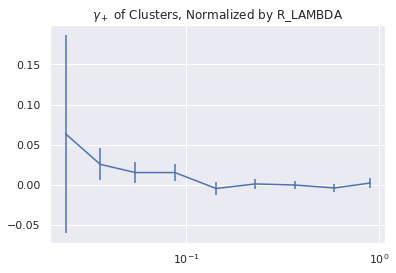

Aggregated xi:
[ 0.     -0.1911 -3.3317 -4.2065 -7.9878  3.9217 -1.7758  0.2264  9.1769
 -4.0962]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.       -11.2191  -432.346   -793.3995 -1261.5601 -1711.4622
 -2118.0377 -2034.0452 -1283.1728  -189.2566]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.    3.  130.  273.  518.  881. 1435. 2025. 2418. 1756.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0637 -0.0256 -0.0154 -0.0154  0.0045 -0.0012  0.0001  0.0038
 -0.0023]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7397 -3.3257 -2.9062 -2.4354 -1.9426 -1.476  -1.0045 -0.5307
 -0.1078]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)